In [19]:
import numpy as np
import random
import os

In [11]:
import matplotlib.pyplot as plt

In [20]:
class TransportationMDP(object):
    def __init__(self, N):
        self.N = N
    def startState(self):
        return 1
    def isEnd(self,state):
        return state == self.N
    def actions(self,state):
        result = []
        if state+1 <= self.N:
            result.append('walk')
        if state*2 <= self.N:
            result.append('tram')
        return result
    def succProbReward(self,state,action):
        #return list of (newState, prob, reward)
        # state = s, action = a, mewState = s'
        # prob = T(s,a,s'), reward = Reward(s,a,s')
        result = []
        if action == 'walk':
            result.append((state+1,1.,-1.))
        elif action == 'tram':
            result.append((state*2,0.5,-2.))
            result.append((state,0.5,-2.))
        return result
    def discount(self):
        return 1.
    def states(self):
        return range(1,self.N+1)
def valueIteration(mdp):
    #initialize
    V = {} # state -> Vopt[state]
    #inithialize all V for all states from 1 to N by zeros
    for state in mdp.states():
        V[state] = 0
    # Q(s,a)
    def Q(state,action):
        return sum(prob*(reward + mdp.discount()*V[newState]) for newState,prob,reward in mdp.succProbReward(state,action))
    while True:
        #compute the new values getting old values
        newV = {}
        for state in mdp.states():
            if mdp.isEnd(state):
                newV[state] = 0
            else:
                newV[state] = max(Q(state,action) for action in mdp.actions(state))
        
        if max(abs(V[state]-newV[state]) for state in mdp.states()) < 1e-10:
            return (pi,V)
        for state in mdp.states():
            V[state] = newV[state]
        #read out policy
        pi = {}
        for state in mdp.states():
            if mdp.isEnd(state):
                pi[state] = 'none'
            else:
                pi[state] = max((Q(state,action),action) for action in mdp.actions(state))[1]
        #print stuff out
        print('{:15} {:15} {:15}'.format('s','V(s)','pi(s)'))
        for state in mdp.states():
            print('{:15} {:15} {:15}'.format(state,V[state],pi[state]))
        input()
mdp = TransportationMDP(N=30)

pi,V = valueIteration(mdp)
#print(mdp.succProbReward(3,'tram'))

s               V(s)            pi(s)          
              1            -1.0 walk           
              2            -1.0 walk           
              3            -1.0 walk           
              4            -1.0 walk           
              5            -1.0 walk           
              6            -1.0 walk           
              7            -1.0 walk           
              8            -1.0 walk           
              9            -1.0 walk           
             10            -1.0 walk           
             11            -1.0 walk           
             12            -1.0 walk           
             13            -1.0 walk           
             14            -1.0 walk           
             15            -1.0 walk           
             16            -1.0 walk           
             17            -1.0 walk           
             18            -1.0 walk           
             19            -1.0 walk           
             20            -1.0 walk    


s               V(s)            pi(s)          
              1            -7.0 walk           
              2            -7.0 walk           
              3            -7.0 walk           
              4            -7.0 walk           
              5            -7.0 walk           
              6            -7.0 walk           
              7            -7.0 tram           
              8            -7.0 walk           
              9            -7.0 walk           
             10            -7.0 walk           
             11            -7.0 walk           
             12            -6.5 walk           
             13           -5.75 walk           
             14          -4.875 walk           
             15         -3.9375 tram           
             16            -7.0 walk           
             17            -7.0 walk           
             18            -7.0 walk           
             19            -7.0 walk           
             20            -7.0 walk   


s               V(s)            pi(s)          
              1           -13.0 walk           
              2        -12.9375 walk           
              3        -12.4375 walk           
              4      -11.703125 walk           
              5       -10.84375 walk           
              6     -9.91796875 walk           
              7     -8.95703125 tram           
              8         -10.875 walk           
              9         -9.9375 walk           
             10        -8.96875 walk           
             11       -7.984375 walk           
             12      -6.9921875 walk           
             13     -5.99609375 walk           
             14    -4.998046875 walk           
             15   -3.9990234375 tram           
             16           -13.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk           
             20           -10.0 walk   


s               V(s)            pi(s)          
              1    -14.95703125 walk           
              2  -13.9775390625 walk           
              3    -12.98828125 walk           
              4 -11.993896484375 walk           
              5 -10.996826171875 walk           
              6 -9.99835205078125 walk           
              7 -8.9991455078125 tram           
              8   -10.998046875 walk           
              9   -9.9990234375 walk           
             10  -8.99951171875 walk           
             11 -7.999755859375 walk           
             12 -6.9998779296875 walk           
             13 -5.99993896484375 walk           
             14 -4.999969482421875 walk           
             15 -3.9999847412109375 tram           
             16           -14.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk           
             20         


s               V(s)            pi(s)          
              1 -14.9991455078125 walk           
              2 -13.999557495117188 walk           
              3 -12.999771118164062 walk           
              4 -11.999881744384766 walk           
              5 -10.99993896484375 walk           
              6 -9.999968528747559 walk           
              7 -8.999983787536621 tram           
              8 -10.999969482421875 walk           
              9 -9.999984741210938 walk           
             10 -8.999992370605469 walk           
             11 -7.999996185302734 walk           
             12 -6.999998092651367 walk           
             13 -5.999999046325684 walk           
             14 -4.999999523162842 walk           
             15 -3.999999761581421 tram           
             16           -14.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk   


s               V(s)            pi(s)          
              1 -14.999983787536621 walk           
              2 -13.999991655349731 walk           
              3 -12.999995708465576 walk           
              4 -11.999997794628143 walk           
              5 -10.99999886751175 walk           
              6 -9.999999418854713 walk           
              7 -8.999999701976776 tram           
              8 -10.999999523162842 walk           
              9 -9.999999761581421 walk           
             10 -8.99999988079071 walk           
             11 -7.999999940395355 walk           
             12 -6.999999970197678 walk           
             13 -5.999999985098839 walk           
             14 -4.999999992549419 walk           
             15 -3.9999999962747097 tram           
             16           -14.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk 


s               V(s)            pi(s)          
              1 -14.999999701976776 walk           
              2 -13.999999847263098 walk           
              3 -12.999999921768904 walk           
              4 -11.99999995995313 walk           
              5 -10.999999979510903 walk           
              6 -9.999999989522621 walk           
              7 -8.999999994644895 tram           
              8 -10.99999999254942 walk           
              9 -9.99999999627471 walk           
             10 -8.999999998137355 walk           
             11 -7.999999999068677 walk           
             12 -6.999999999534339 walk           
             13 -5.999999999767169 walk           
             14 -4.999999999883585 walk           
             15 -3.9999999999417923 tram           
             16           -14.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk  


s               V(s)            pi(s)          
              1 -14.999999994644895 walk           
              2 -13.99999999726424 walk           
              3 -12.999999998603016 walk           
              4 -11.999999999286956 walk           
              5 -10.999999999636202 walk           
              6 -9.999999999814463 walk           
              7 -8.999999999905413 tram           
              8 -10.999999999883585 walk           
              9 -9.999999999941792 walk           
             10 -8.999999999970896 walk           
             11 -7.999999999985448 walk           
             12 -6.999999999992724 walk           
             13 -5.999999999996362 walk           
             14 -4.999999999998181 walk           
             15 -3.9999999999990905 tram           
             16           -14.0 walk           
             17           -13.0 walk           
             18           -12.0 walk           
             19           -11.0 walk

In [21]:
pi


{1: 'walk',
 2: 'walk',
 3: 'walk',
 4: 'walk',
 5: 'walk',
 6: 'walk',
 7: 'tram',
 8: 'walk',
 9: 'walk',
 10: 'walk',
 11: 'walk',
 12: 'walk',
 13: 'walk',
 14: 'walk',
 15: 'tram',
 16: 'walk',
 17: 'walk',
 18: 'walk',
 19: 'walk',
 20: 'walk',
 21: 'walk',
 22: 'walk',
 23: 'walk',
 24: 'walk',
 25: 'walk',
 26: 'walk',
 27: 'walk',
 28: 'walk',
 29: 'walk',
 30: 'none'}

In [22]:
def prop(N,pi):
    S = 1
    reward = 0
    while True:
        if pi[S] == "walk":
            S = S+1
            reward = reward-1
        else:
            ran = random.randint(1,2)
            if ran == 1:
                S = S*2
                reward = reward-2
            else:
                reward = reward-2
        if(S == N):
            return reward

In [23]:
reward = 0
for i in range(10000):    
    reward += prop(30,pi)

In [24]:
reward/10000

-14.9792

In [25]:
def factorial(n):
    if n==1:
        return 1
    return n*factorial(n-1)

In [26]:
factorial(36)

371993326789901217467999448150835200000000

# flip coin 

In [39]:
class CoinMDP(object):
    def __init__(self, N):
        self.N = N
    def startState(self):
        return 1
    def isEnd(self,state):
        return state >= self.N-1 or state == 0
    def actions(self,state):
        result = []
        if(state >=1 and state<100):
            if(state <= 50):
                result = list(range(1,state+1))
            else:
                result = list(range(1,100-state))
        return result
    def succProbReward(self,state,action):
        #return list of (newState, prob, reward)
        # state = s, action = a, mewState = s'
        # prob = T(s,a,s'), reward = Reward(s,a,s')
        result = []
        result.append((state+action,0.65,action))
        result.append((state-action,0.35,-action))
        return result
    def discount(self):
        return 0.8
    def states(self):
        return range(0,self.N+1)
def valueIteration2(mdp):
    #initialize
    V = {} # state -> Vopt[state]
    #inithialize all V for all states from 1 to N by zeros
    for state in mdp.states():
        V[state] = 0
    # Q(s,a)
    def Q(state,action):
        return sum(prob*(reward + mdp.discount()*V[newState]) for newState,prob,reward in mdp.succProbReward(state,action))
    while True:
        #compute the new values getting old values
        newV = {}
        for state in mdp.states():
            if mdp.isEnd(state):
                newV[state] = 0
            else:
                newV[state] = max(Q(state,action) for action in mdp.actions(state))
        
        if max(abs(V[state]-newV[state]) for state in mdp.states()) < 1e-10:
            return (pi,V,state)
        for state in mdp.states():
            V[state] = newV[state]
        #read out policy
        pi = {}
        for state in mdp.states():
            if mdp.isEnd(state):
                pi[state] = 'none'
            else:
                pi[state] = max((Q(state,action),action) for action in mdp.actions(state))[1]
        #print stuff out
        print('{:15} {:15} {:15}'.format('s','V(s)','pi(s)'))
        for state in mdp.states():
            print('{:15} {:15} {:15}'.format(state,V[state],pi[state]))
mdp = CoinMDP(N=100)

pi,V,state = valueIteration2(mdp)
#print(mdp.succProbReward(3,'tram'))

s               V(s)            pi(s)          
              0               0 none           
              1 0.30000000000000004               1
              2 0.6000000000000001               2
              3 0.9000000000000004               3
              4 1.2000000000000002               4
              5             1.5               5
              6 1.8000000000000007               6
              7             2.1               7
              8 2.4000000000000004               8
              9 2.7000000000000006               9
             10             3.0              10
             11 3.3000000000000007              11
             12 3.6000000000000014              12
             13 3.9000000000000012              13
             14             4.2              14
             15             4.5              15
             16 4.800000000000001              16
             17 5.100000000000001              17
             18 5.400000000000001              18
   

             17 15.893923847723265              14
             18 16.30165369719844              15
             19 16.684474908713593              15
             20 17.044016952550788              16
             21 17.37399249683654              17
             22 17.680198403932646              17
             23 17.966227134834348              18
             24 18.232838344842904              18
             25 18.479839537289298              19
             26 18.703320891206957              19
             27 18.911546610789323              20
             28 19.096630871271483              21
             29 19.2660731689738              21
             30 19.413115364399587              22
             31 19.546096159770777              22
             32 19.65723035730855              23
             33 19.753187406999047              23
             34 19.830738508693173              24
             35 19.895982795835515              24
             36 19.94527807276118   

s               V(s)            pi(s)          
              0               0 none           
              1 2.4219731284332235               1
              2 4.080719388181929               2
              3 5.470549505623123               3
              4 6.693693438194272               4
              5 7.7773747769193875               4
              6 8.78952113516347               5
              7 9.719295557451577               6
              8 10.564797977071217               7
              9 11.344662029164276               8
             10 12.055649637891069               9
             11 12.714174094757198              10
             12 13.337981075265231              10
             13 13.925279004362649              11
             14 14.46987340550281              12
             15 14.97432193293676              13
             16 15.45158565849875              13
             17 15.89713750868573              14
             18 16.304733068174635             

s               V(s)            pi(s)          
              0               0 none           
              1 2.421975889727843               1
              2 4.0807228651151               2
              3 5.470553810298446               3
              4 6.693697817848831               4
              5 7.777380444098187               4
              6 8.789526558662185               5
              7 9.719301352906262               6
              8 10.56480349626598               7
              9 11.34466768316419               8
             10 12.055655026533563               9
             11 12.714179441918727              10
             12 13.337987057981413              10
             13 13.925284815499015              11
             14 14.46987906050764              12
             15 14.9743273988578              13
             16 15.451591464641863              13
             17 15.897143142905165              14
             18 16.304738451661844              15


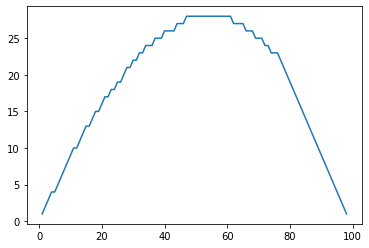

In [40]:
Pi = []
for i in range(1,101):
    Pi.append(pi[i])
plt.plot(list(range(1,99)),Pi[:98])

# blackJack with Monte Carlo